# Prova 3 AEDS - Problema do Caixeiro Viajante
## Autores: Amanda da Costa Vasconcelos de Moura e Diego Ascânio Santos

## Parte 1: Método da Força Bruta

O método da força bruta verifica cada uma das $ (n - 1)! $ permutações possíveis em um grafo de $ n $ cidades para se percorrer um caminho mínimo passando por todas as cidades com início e fim na cidade de origem.

Aqui geraremos 11 grafos completos (de 2 a 12 vértices) com pesos inteiros aleatórios entre 1 e 100, representados por matrizes de adjacências simétricas, com diagonais principais nulas (ou seja, nenhum vértice possui arestas para si próprio)

Imprimiremos estes grafos e depois, executaremos a resolução do caixeiro viajante pelo método da força bruta, retornando o caminho mínimo encontrado, seu custo e quantos passos foram necessários para cálculá-lo.

Em seguida plotaremos um gráfico relacionando o número de cidades $ n $ com as respectivas quantidade de passos necessárias para calcular o caminho mínimo

N: 2
Adjacencias:
╒════╤═════╤═════╕
│    │   0 │   1 │
╞════╪═════╪═════╡
│  0 │   0 │  51 │
├────┼─────┼─────┤
│  1 │  51 │   0 │
╘════╧═════╧═════╛
Caminho Mínimo: [0 1 0]
Custo do Caminho: 102
Custo Computacional: 1
Tempo de execução: 0.00s

N: 3
Adjacencias:
╒════╤═════╤═════╤═════╕
│    │   0 │   1 │   2 │
╞════╪═════╪═════╪═════╡
│  0 │   0 │   4 │  16 │
├────┼─────┼─────┼─────┤
│  1 │   4 │   0 │  55 │
├────┼─────┼─────┼─────┤
│  2 │  16 │  55 │   0 │
╘════╧═════╧═════╧═════╛
Caminho Mínimo: [0 1 2 0]
Custo do Caminho: 75
Custo Computacional: 2
Tempo de execução: 0.00s

N: 4
Adjacencias:
╒════╤═════╤═════╤═════╤═════╕
│    │   0 │   1 │   2 │   3 │
╞════╪═════╪═════╪═════╪═════╡
│  0 │   0 │  90 │  83 │  23 │
├────┼─────┼─────┼─────┼─────┤
│  1 │  90 │   0 │  26 │  56 │
├────┼─────┼─────┼─────┼─────┤
│  2 │  83 │  26 │   0 │  28 │
├────┼─────┼─────┼─────┼─────┤
│  3 │  23 │  56 │  28 │   0 │
╘════╧═════╧═════╧═════╧═════╛
Caminho Mínimo: [0 1 2 3 0]
Custo do Caminho: 167
Custo 

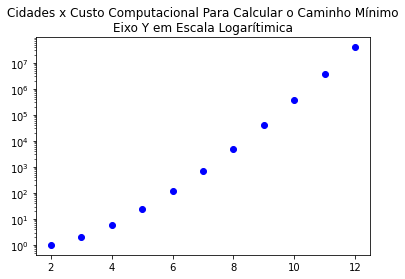

In [3]:
%matplotlib inline
from matplotlib import pyplot
from prova_3_utils import gerar_adjacencia_simetrica_aleatoria, repr_matriz, carregar_grafo_tsp
from TSP import G, TSP
import numpy as np
import time
custos_computacionais = []

for N in range(2, 13):
    begin = time.time()
    adjacencias = gerar_adjacencia_simetrica_aleatoria(N)
    g = G(grafo = adjacencias)
    tsp = TSP(g = g)
    print('N: {}\nAdjacencias:\n{}'.format(N, repr_matriz(adjacencias)))
    caminho_minimo, custo_caminho_minimo, passos = tsp.solve(heuristic = False)
    custos_computacionais.append(passos)
    print('Caminho Mínimo: {}\nCusto do Caminho: {}\nCusto Computacional: {}'.format(caminho_minimo,
                                                                                     custo_caminho_minimo,
                                                                                     passos))
    print('Tempo de execução: {:.2f}s\n'.format(time.time() - begin))

pyplot.title('Cidades x Custo Computacional Para Calcular o Caminho Mínimo\n' + 
             'Eixo Y em Escala Logarítimica')
pyplot.yscale('log')
pyplot.plot(np.arange(2,13), custos_computacionais, 'bo');

## Parte 2 - Solução Heurística

1. Implementar uma solução heurística para resolver o problema do Caixeiro Viajante, a Heurística fica à nossa escolha.

2. Aplicar a heurística escolhida aos problemas __si535.tsp__, __pa561.tsp__ e __si1032.tsp__

A heurística escolhida para resolver o problema foi a heurística nearest neighbor (vizinho mais próximo) que consiste em:

1. Defina u como o vértice de origem do caixeiro viajante
2. Enquanto Houverem Vértices a Serem Visitados:
    1. Visite o vértice v mais próximo adjacente a u
    2. Adicione v aos vértices visitados
    3. Atualize u para o ultimo vértice v visitado

Essa heurística não é ótima, segundo JONHSON e MCGEOCH(1995) a heurística retorna em média caminhos 25% maiores do que o caminho mínimo, mas, é uma heurística fácil de ser implementada e que retorna um caminho candidato em custo O(n^2).

Por isso, é a heurística escolhida para resolver o problema do caixeiro viajante.

Assim, a solução heurística foi implementada (disponível no método **__nearest_neighbour_heuristic** em __TSP.py__) e abaixo a aplicação da heurística aos problemas __si535.tsp__, __pa561.tsp__ e __si1032.tsp__

Quantidade de Cidades: 535
Caminho Mínimo: [0, 8, 20, 135, 486, 502, 509, 521, 529, 510, 497, 481, 478, 491, 511, 518, 531, 201, 226, 240, 246, 257, 234, 228, 212, 247, 213, 227, 238, 244, 263, 237, 224, 210, 242, 259, 527, 515, 514, 490, 485, 488, 499, 513, 516, 532, 524, 534, 279, 319, 146, 341, 288, 317, 337, 287, 310, 338, 290, 321, 334, 291, 309, 340, 137, 139, 141, 143, 136, 138, 140, 142, 144, 145, 171, 172, 173, 174, 148, 149, 327, 316, 280, 273, 271, 278, 320, 328, 272, 281, 318, 332, 277, 270, 308, 150, 151, 333, 284, 307, 329, 254, 248, 232, 216, 207, 206, 217, 236, 251, 258, 218, 204, 25, 533, 26, 520, 27, 507, 496, 483, 23, 22, 21, 492, 476, 468, 10, 28, 428, 422, 409, 437, 32, 447, 11, 454, 469, 457, 445, 429, 411, 414, 435, 443, 12, 36, 453, 471, 470, 465, 433, 415, 24, 9, 475, 503, 31, 508, 30, 523, 29, 528, 209, 215, 241, 243, 262, 233, 221, 211, 245, 264, 33, 526, 34, 519, 35, 505, 501, 489, 487, 494, 39, 506, 38, 517, 37, 530, 13, 40, 371, 375, 373, 372, 364, 2, 362,

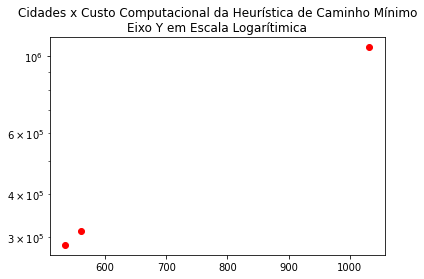

In [4]:
%matplotlib inline
from matplotlib import pyplot
from prova_3_utils import gerar_adjacencia_simetrica_aleatoria, repr_matriz, carregar_grafo_tsp
from TSP import G, TSP
import numpy as np
import time

filepaths = ['tsp_files/si535.tsp', 'tsp_files/pa561.tsp', 'tsp_files/si1032.tsp']
custos_computacionais = []

for filepath in filepaths:
    begin = time.time()
    g = G(grafo = carregar_grafo_tsp(filepath))
    tsp = TSP(g = g)
    caminho_minimo, custo_caminho_minimo, passos = tsp.solve()
    custos_computacionais.append((g.adjacencias.shape[0], passos))
    print('Quantidade de Cidades: {}\nCaminho Mínimo: {}'.format(g.adjacencias.shape[0], caminho_minimo))
    print('Custo do Caminho: {}\nCusto Computacional: {}'.format(custo_caminho_minimo, passos))
    print('Tempo de execução: {:.2f}s\n'.format(time.time() - begin))
    
pyplot.title('Cidades x Custo Computacional da Heurística de Caminho Mínimo\n' + 
             'Eixo Y em Escala Logarítimica')
pyplot.yscale('log')
for N, c in custos_computacionais:
    pyplot.plot(N, c, 'ro');

## Referências Bibliográficas

- JOHNSON, David S.; MCGEOCH, Lyle A. The traveling salesman problem: A case study in local optimization. __Local search in combinatorial optimization__, v. 1, n. 1, p. 215-310, 1997.